In [3]:
import numpy as np 
from src.models.Descriptive import NRM 
from src.utils.plot import plot_spike

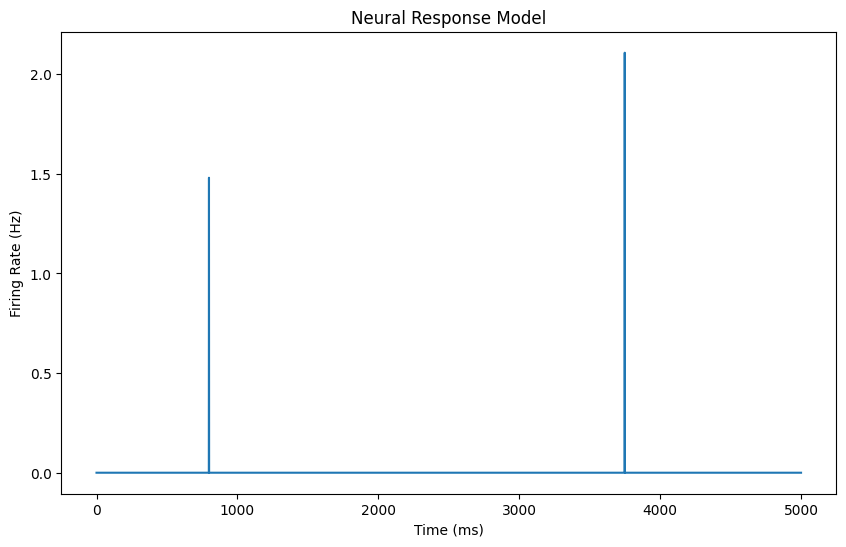

In [4]:
duration = 5 
hz = 1000
epochs = duration * hz 
input_stimulus = np.random.randn(epochs)
dt = 1/hz
kernel = np.array([0.1, 0.3, 0.6, 0.3, 0.1])
firing_rates = NRM.LNP(kernel,input_stimulus,None,dt).simulate()
plot_spike(np.arange(epochs),firing_rates,title="Neural Response Model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [5]:
time_constant = 10.0  
external_input = np.sin(np.linspace(0,2*np.pi,100))
dt = 0.01  
num_steps = 100 

In [6]:
model = NRM.ReLUModel(time_constant, dt)
model.simulate(external_input)
firing_rate = model.get_firing_rate()

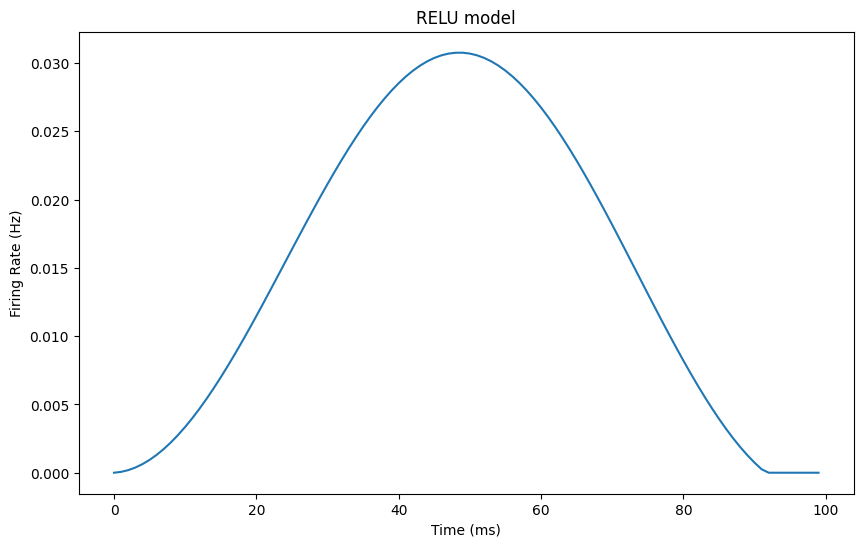

In [7]:
plot_spike(np.arange(num_steps),firing_rate,title="RELU model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [8]:
from src.models.Descriptive import PRM 
firing_rate = 5
stimulus_intensity = 10
response_gain = 20

time_steps = 100
dt = 0.01

model = PRM.FRM(firing_rate, stimulus_intensity, response_gain)

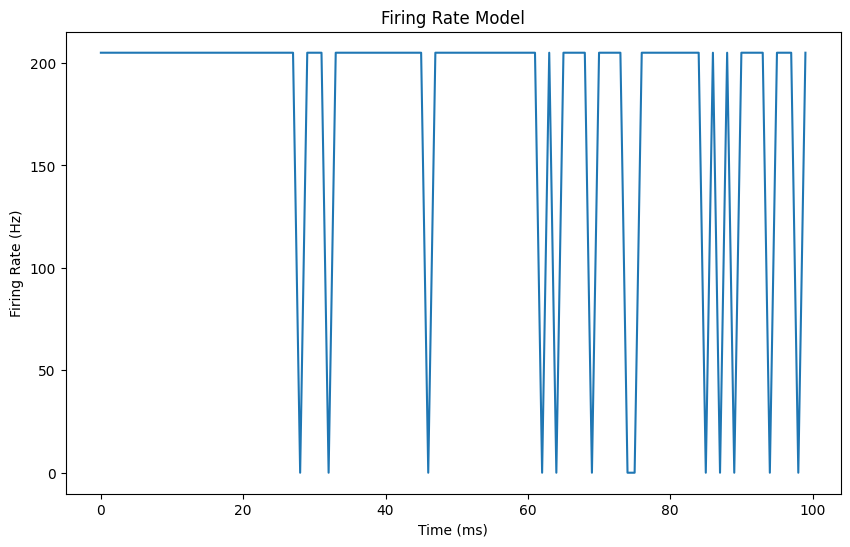

In [9]:
firing_rates = model.simulate(time_steps, dt)

plot_spike(np.arange(time_steps),firing_rates,title="Firing Rate Model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [1]:
from src.models.Descriptive import PRM 
from src.utils.plot import plot_spike
import numpy as np
data_points = [2.5, 3.0, 3.2, 2.8, 3.5]

time_steps = 10000
dt = 0.001

model = PRM.GPM()
model.fit(data_points)

In [2]:
def update(frame):
    time = frame / 10.0 
    population_activity = model.simulate(time_steps, dt)
    line.set_data(time,population_activity)

    ax.relim()
    ax.autoscale_view()

In [3]:
import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
matplotlib.use("TkAgg")

fig,ax = plt.subplots()
ax.set_xlim(0,1000)
ax.set_ylim(0,1.6)
line, = ax.plot([],[],lw=2)
ani = FuncAnimation(fig,update,frames = np.arange(0,100),blit=False,interval=100)

In [4]:
population_act = model.simulate(time_steps, dt)
plot_spike(np.arange(time_steps),population_act,title="Gaussian Population Model",xlabel="Time (ms)",ylabel="Population Activity")

In [1]:
from src.algorithms import spikes 
import numpy as np 

spike_waveforms = np.random.randn(4,5)
print(spike_waveforms)

[[-3.74156177e-01 -3.38850616e-01  8.93302266e-01 -2.90941937e-01
  -1.77442125e-01]
 [-1.51101534e+00  3.86515603e-01 -9.11026670e-01  6.94386729e-01
   1.70490260e+00]
 [ 1.04554296e+00  1.17798604e+00 -4.43070200e-02  3.33163814e-01
   4.30562537e-04]
 [ 8.74514845e-01 -1.36774674e-01 -1.04629146e+00 -1.08995584e+00
   6.91402420e-01]]


In [2]:
model = spikes.Classify_WF(spike_waveforms)
clusters = model.fit()

c:\Users\anisr\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\anisr\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


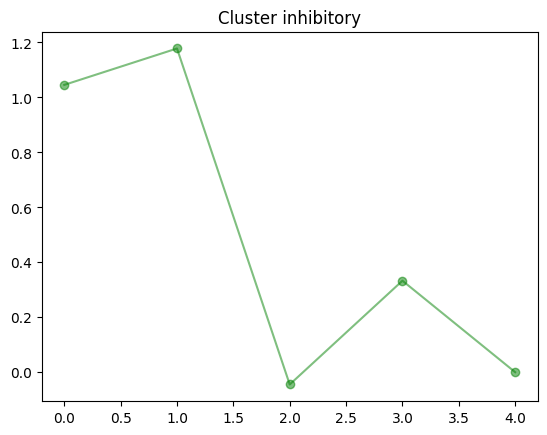

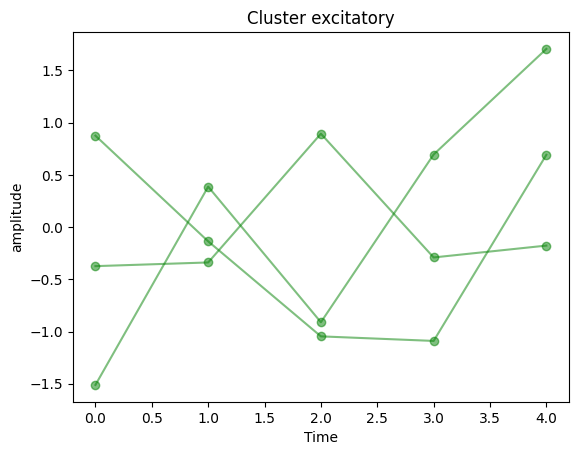

In [7]:
model.visualize()

In [1]:
from src.models.Descriptive import NFM
from src.utils.plot import plot_spike
import numpy as np

In [19]:
model = NFM.WCM(a=2,b=1.5,t_e=1.5,t_i=0.5)
model.initialize(0.2,0.2)
r_e,r_i,time = model.simulate(T=20.0)


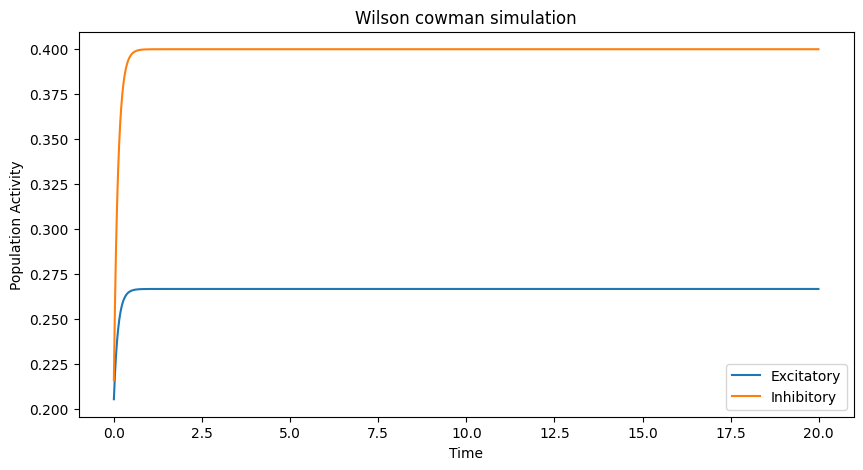

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(time, r_e, label='Excitatory')
plt.plot(time, r_i, label='Inhibitory')
plt.xlabel('Time')
plt.ylabel('Population Activity')
plt.legend()
plt.title('Wilson cowman simulation');


In [14]:
from src.models.Descriptive import NFM
from src.utils.plot import plot_spike
import numpy as np
from decimal import Decimal


model = NFM.Amari()
model.initialize()
V,W = model.simulate(Int=3,T = 3)

Text(0, 0.5, 'Population Activity')

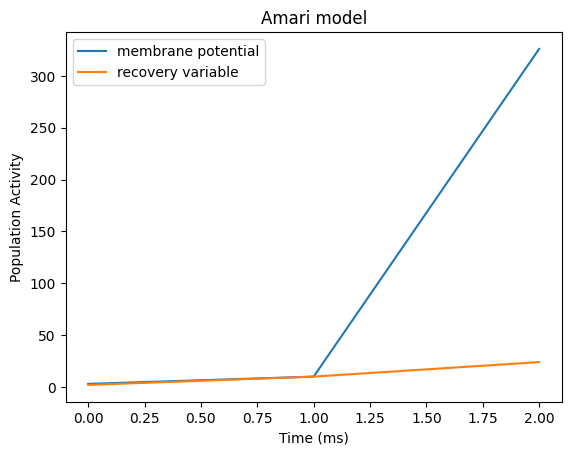

In [15]:
import matplotlib.pyplot as plt 
plt.plot(range(0,3),V,label = "membrane potential")
plt.plot(range(0,3),W,label = "recovery variable")
plt.legend()
plt.title("Amari model")
plt.xlabel("Time (ms)")
plt.ylabel("Population Activity")

In [1]:
import matplotlib.pyplot as plt 
from src.models.Interpretive import IFM
from src.utils.plot import plot_spike

In [2]:
import numpy as np 
In = np.zeros(1000)
In[200:800] = 1.
model = IFM.LIF()
time,membrane_potential, spikes = model.simulate(In)

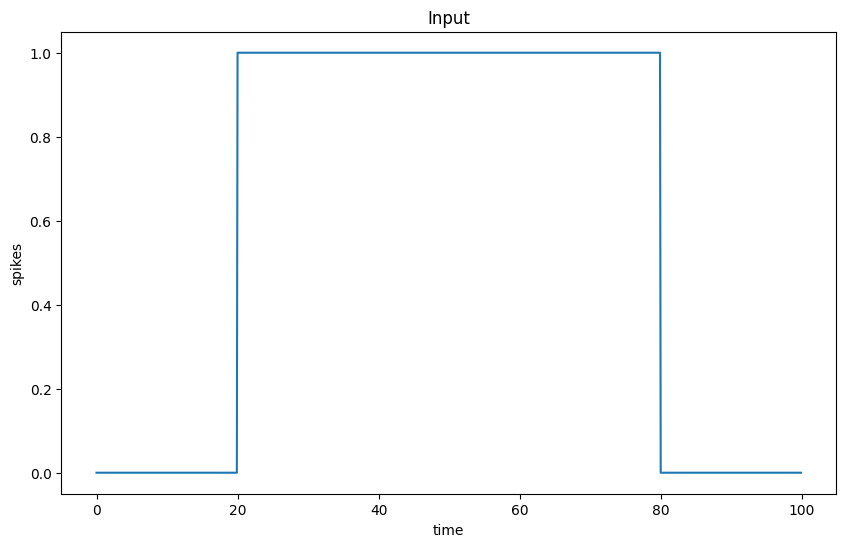

In [5]:
plot_spike(time,In,title="Input",xlabel="time",ylabel="spikes")

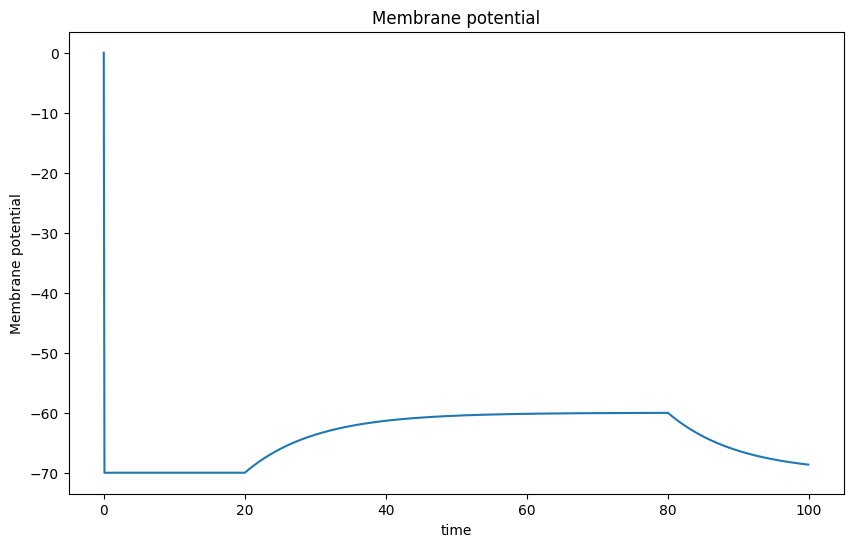

In [6]:
plot_spike(time,membrane_potential,title="Membrane potential",xlabel="time",ylabel="Membrane potential")

In [7]:
model = IFM.AdEx()
time,membrane_potential,spikes = model.simulate(In)

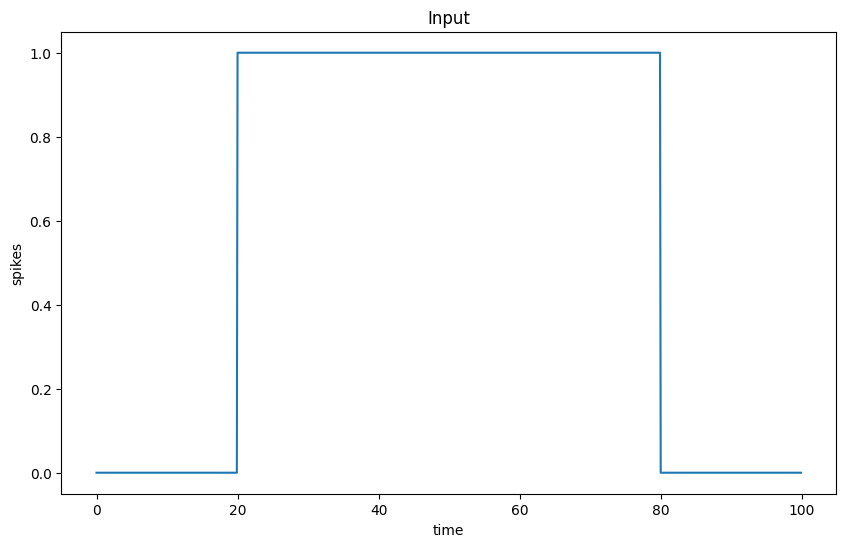

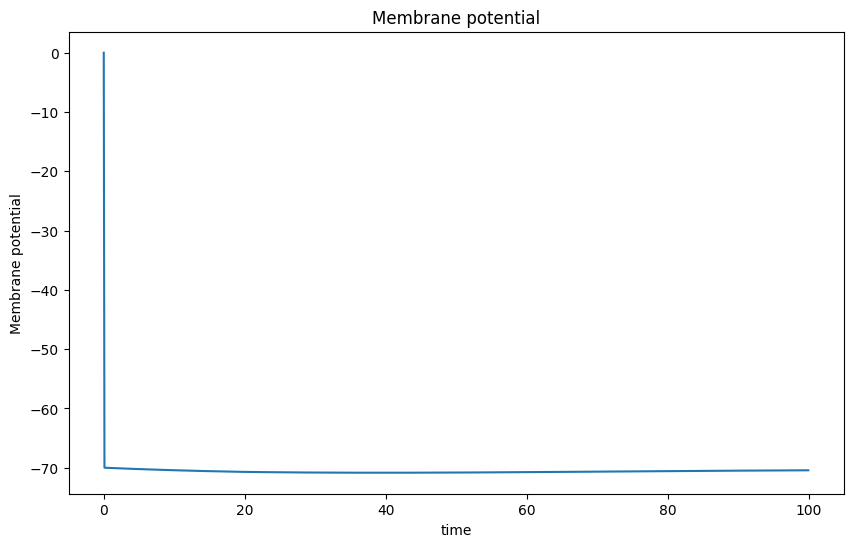

In [8]:
plot_spike(time, In,title="Input",xlabel="time",ylabel="spikes")
plot_spike(time, membrane_potential,title="Membrane potential",xlabel="time",ylabel="Membrane potential")

In [1]:
import matplotlib.pyplot as plt
from src.models.Interpretive import IFM
from src.utils.plot import plot_spike
import numpy as np

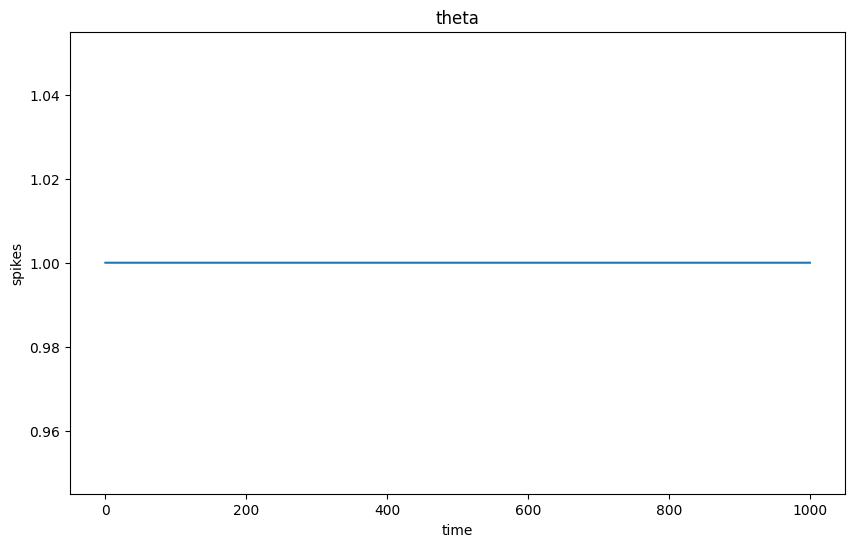

In [15]:
model = IFM.ThetaNeuron(a=0.01,b=0.4,I=3.5,omega=2.3)
time,theta,spikes = model.simulate(1000.,0.1)

plot_spike(spikes,np.ones_like(spikes),title="theta",xlabel="time",ylabel="spikes")